In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# you can also just unzip the mnist.data.zip file into same dir

In [9]:
import pickle
#import tensorflow_datasets as tfds

with open('mnist.data.pickle', 'wb') as mnist_file:
    pickle.dump(mnist, mnist_file)

# tfds load mist
#mnist = tfds.load('mnist', shuffle_files=True)

#with open('mnist.data.pickle', 'rb') as mnist_file:
#    mnist = pickle.load(mnist_file)

In [10]:
x, y = mnist.data, mnist.target.astype(int)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [12]:
from sklearn.decomposition import PCA

In [13]:
exp_var = [i/100 for i in range(95, 5, -5)] # 0.95, 0.9, ..., 0.15, 0.1
models = []
projections = []
reconstructions = []
reconstructions_backscaled = []

In [14]:
for i in exp_var:
    print(i, end=' ')
    pca = PCA(i)
    pca.fit(x_scaled)
    models.append(pca)
    projections.append(pca.transform(x_scaled))
    reconstructions.append(projections[-1] @ pca.components_)
    reconstructions_backscaled.append(scaler.inverse_transform(reconstructions[-1]))


0.95 0.9 0.85 0.8 0.75 0.7 0.65 0.6 0.55 0.5 0.45 0.4 0.35 0.3 0.25 0.2 0.15 0.1 

In [15]:
import random
import matplotlib.pyplot as plt

In [16]:
sample = random.randint(0, len(x)-1)
print(sample)

43970


In [17]:
original = x.iloc[[sample]].to_numpy()

Original


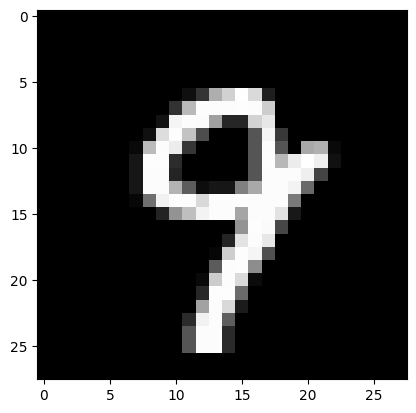

In [18]:
print('Original')
plt.imshow(
    original.reshape(28,28),
    cmap=plt.cm.gray,
    interpolation='nearest',
    clim=(0,255)
)
plt.show()

N Components   Explained variance
         332   0.95


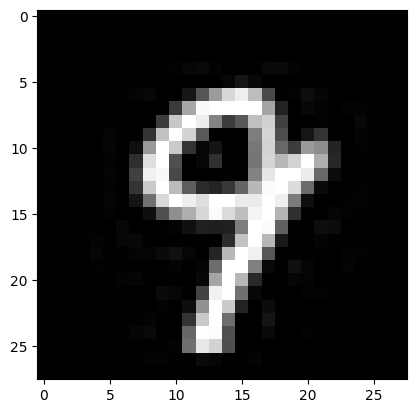

N Components   Explained variance
         238   0.90


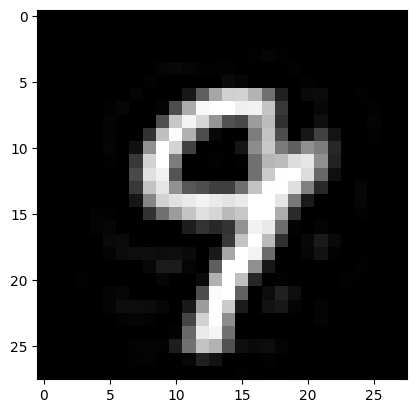

N Components   Explained variance
         186   0.85


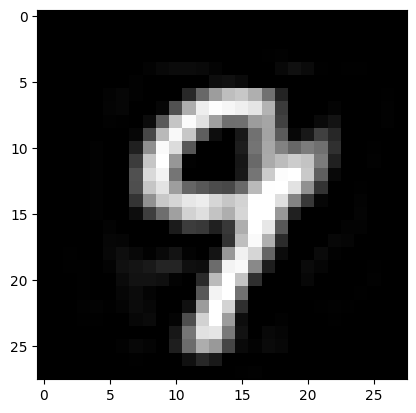

N Components   Explained variance
         150   0.80


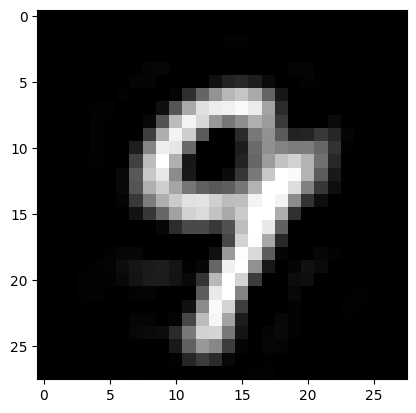

N Components   Explained variance
         121   0.75


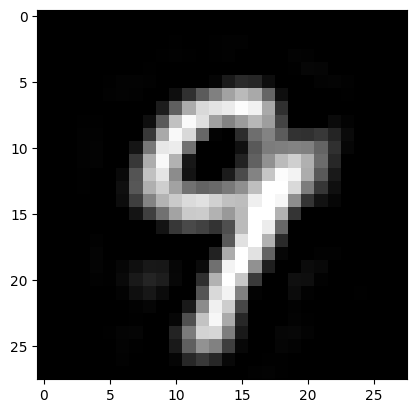

N Components   Explained variance
          99   0.70


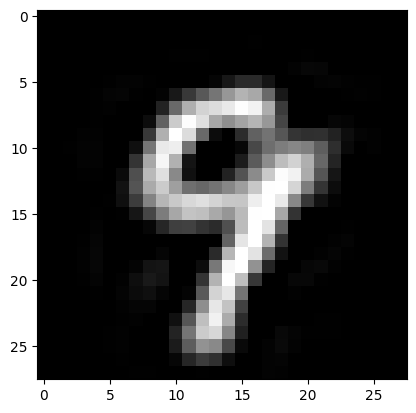

N Components   Explained variance
          80   0.65


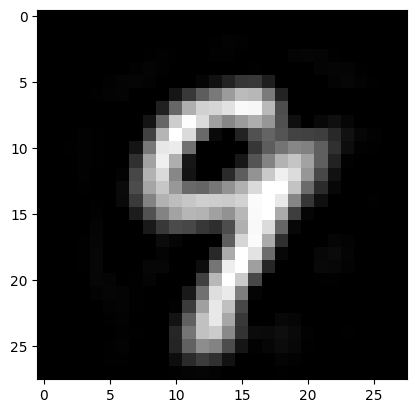

N Components   Explained variance
          64   0.60


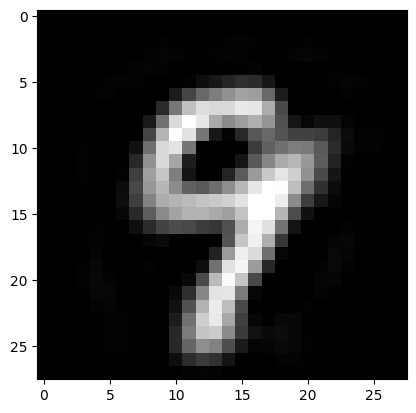

N Components   Explained variance
          51   0.55


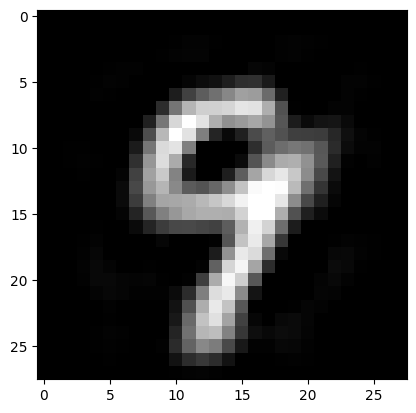

N Components   Explained variance
          39   0.50


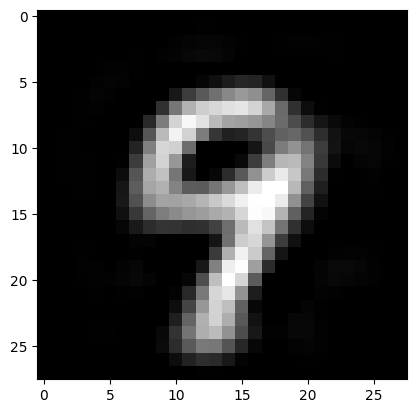

N Components   Explained variance
          30   0.45


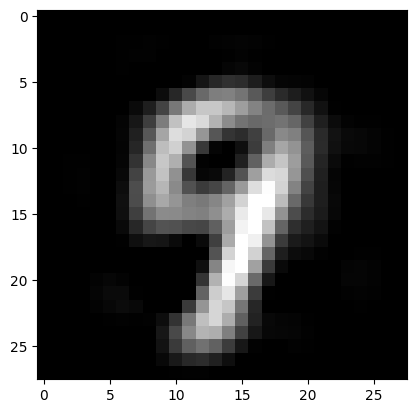

N Components   Explained variance
          23   0.40


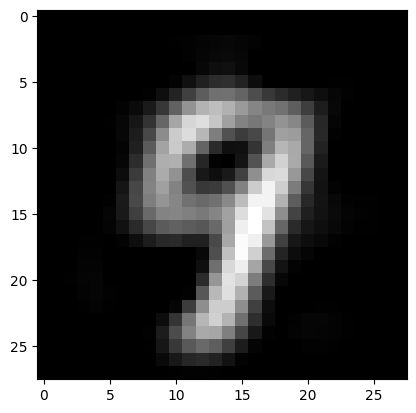

N Components   Explained variance
          17   0.35


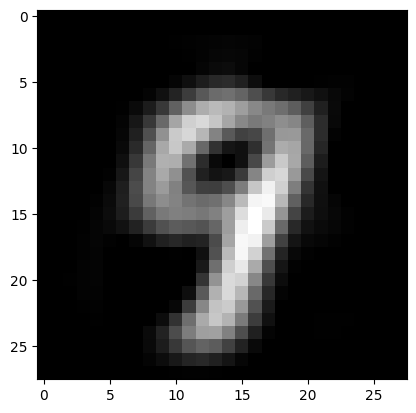

N Components   Explained variance
          12   0.30


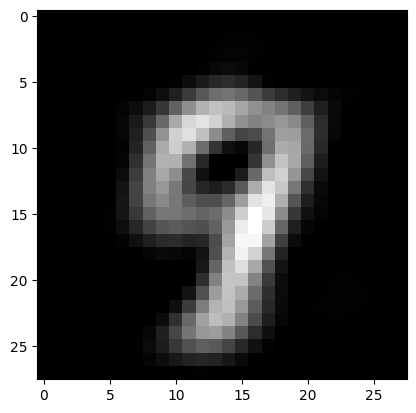

N Components   Explained variance
           9   0.25


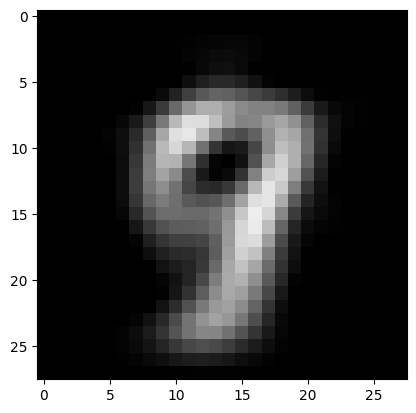

N Components   Explained variance
           6   0.20


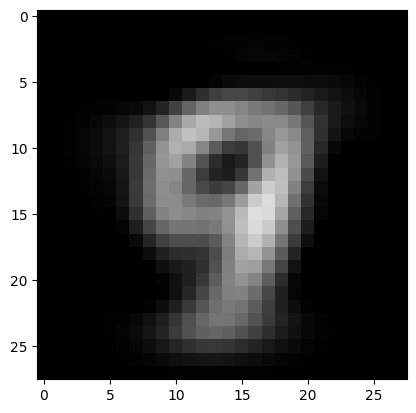

N Components   Explained variance
           4   0.15


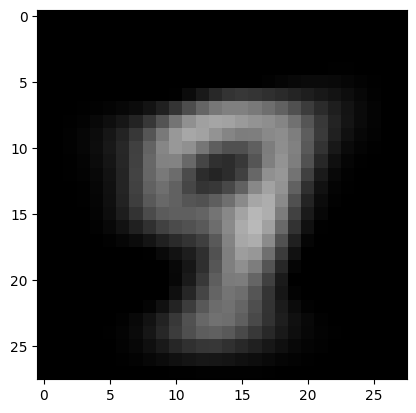

N Components   Explained variance
           3   0.10


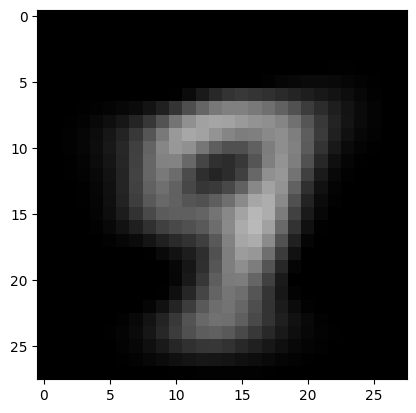

In [19]:
#for i, (j, k) in enumerate(zip(exp_var, models)):
#    print('N Components   Explained variance')
#    print(f'{k.n_components_:>12}   {j:.2f}')
#    plt.imshow(
#        reconstructions_backscaled[i][sample].reshape(28,28),
#        cmap=plt.cm.gray,
#        interpolation='nearest',
#        clim=(0,255)
#    )
#    plt.show()